# ** Full model redo: intron overalpping ** 

In [3]:
from numpy.random import choice
import copy 
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import time
import timeit
import numpy as np 
import matplotlib.patches as mpatches
import json

In [2]:
def base_to_mutate(DNA, current_weights, indices): 
    """
    (DNA: str, weights: Dict) -> int
    
    Will return the index of a random choice of a base that will be mutated based on probabilities given by the
    weights dictionary (i.e. the model)
    ex. "ATCGTA" --> index 3 ("G") will mutate
    """

    # NORMALIZE THE POPULATION OF WEIGHTS    
    total_freq = sum(current_weights) - current_weights[0] - current_weights[-1] # remove the start and end weight
    normalized_weights = ["error"]*len(current_weights)
    for index, value in enumerate(current_weights):
        normalized_weights[index] = value/total_freq 
    
    normalized_weights[0] = 0
    normalized_weights[-1] = 0
    # DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
    base_index = choice(indices, p=normalized_weights) 
    

    # RETURN THE INDEX
    return base_index  




In [13]:
tmp_value = 0
for mut_key,mut_value in json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt")).items(): 
    if (mut_value[0]) > tmp_value: 
        tmp_value = mut_value[0]
        trip = mut_key
    #tmp_list.append(mut_key)

In [15]:
tmp_value, trip

(0.00036217158636308954, 'ACG')

In [12]:
min(tmp_list), max(tmp_list)

(1.3198444035923253e-05, 0.00036217158636308954)

In [6]:
mut_value, mut_key

([1.3198444035923253e-05,
  {'GCA': 0.24535315985130113,
   'GGA': 0.5563816604708798,
   'GTA': 0.1982651796778191}],
 'GAA')

In [7]:
json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))["AAA"]

[1.4524195153728667e-05,
 {'ACA': 0.30213270142180093,
  'AGA': 0.5242890995260664,
  'ATA': 0.1735781990521327}]

## ** now it has the accurate into base prob, not random ** 

In [115]:
#informing the graph 
sim_details = ""

#making the dna ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dna_length = 20000
DNA  = choice(["A", "T", "C", "G"], size = dna_length)
DNA = "".join(DNA)
DNA_initial = copy.copy(DNA)
sim_details += str(dna_length/1000000) + "MB random seq \n "

#triplets
triplets = []
for i_1 in ["A", "T", "G", "C"]: 
    for i_2 in ["A", "T", "G", "C"]: 
        for i_3 in ["A", "T", "G", "C"]: 
            triplets.append(i_1+i_2+i_3)
        
#mutability model 
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))
#triplet-count dict 
triplet_chosen_count_dict = {}
triplet_into_count_dict = {}
for triplet in triplets: 
    triplet_chosen_count_dict[triplet] = [0,0,0]  
    triplet_into_count_dict[triplet] = [0,0,0]

#making the weights 
current_weights = []
for i in range(1,len(DNA)-1): 
    triplet = DNA[i-1:i+2]
    current_weights.append(model[triplet][0])

indices = [i for i in range(1, len(DNA)-1)]
mut_indices = []

#choosing number of muts 
prop_muts = 10
sim_details += str(prop_muts)+"X prop muts \n"


# DESCRIBE THE SIMULATION PLEASE GOD ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!!!!!!!!
sim_details = "random onto triplet,  overlapping" + sim_details

#runnign the sim ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for i in tqdm(range(int(len(DNA)*prop_muts))):
#     s0 = time.time()
    base_index = base_to_mutate(DNA, current_weights, indices)
    
#     s1 = time.time()
#     t1 = time.time() - s0
    
#     curr_index = indices.index(base_index)
#     current_weights = current_weights[0:curr_index -2]+current_weights[curr_index+3:]
    
    mut_indices.append(base_index)
#     s2 = time.time()
#     t2 = time.time() - s1
    #adding the count for "chosen to mutate" in coutns dict 
    c_triplet = DNA[base_index-1: base_index+2]
    c_triplet_left = DNA[base_index-2: base_index+1]
    c_triplet_right = DNA[base_index: base_index+3]
#     s3 = time.time()
#     t3 = time.time() - s2
    
    triplet_chosen_count_dict[c_triplet_left][0] += 1
    triplet_chosen_count_dict[c_triplet][1] += 1
    triplet_chosen_count_dict[c_triplet_right][2] += 1
    
    
    #accurate model INTO probability ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~OR ^ 
    curr_into_bases = []
    curr_into_bases_probs = []
    for into_base, prob in model[c_triplet][1].items(): 
        curr_into_bases.append(into_base)
        curr_into_bases_probs.append(prob)
    mb =  choice(curr_into_bases, p = curr_into_bases_probs)[1]

    #adding the count for "mutated into thiss" in the triplet dict 
    m_triplet = c_triplet[0]+mb+c_triplet[2]
    m_triplet_left = c_triplet_left[0:2]+mb
    m_triplet_right = mb+c_triplet_right[1:3]
    
    triplet_into_count_dict[m_triplet_left][0] += 1 
    triplet_into_count_dict[m_triplet][1] += 1 
    triplet_into_count_dict[m_triplet_right][2] += 1 
#     s6 = time.time()
#     t6 = time.time() - s5
    
    #chanaging the dna 
    DNA = DNA[:base_index]+mb+DNA[base_index+1:]
#     s7 = time.time()
#     t7 = time.time() - s6

    current_weights[base_index-2]= model[m_triplet_left][0]    
    current_weights[base_index-1]= model[m_triplet][0]
    current_weights[base_index] = model[m_triplet_right][0]
    



  1%|          | 1088/200000 [00:05<16:06, 205.83it/s]


KeyboardInterrupt: 

In [10]:
i

499999

# ** PLOTTING GENOME VS SIM TRIPLET FREQS ** 

** getting and normalizing the simulation  triplet couts ** 

In [11]:
triplet_counts = {}
muts = []
for triplet in triplets: 
    triplet_counts[triplet] = 0
    muts.append(model[triplet][0])

for i in tqdm(range(1, len(DNA)-2)):
    triplet = DNA[i-1:i+2]
    triplet_counts[triplet] += 1

triplet_counts_list = []
for triplet in triplets: 
    triplet_counts_list.append(triplet_counts[triplet])

100%|██████████| 49997/49997 [00:00<00:00, 1133717.63it/s]


In [12]:
sum_trips_sim = sum(triplet_counts_list)

In [13]:
for index, element in enumerate(triplet_counts_list): 
    triplet_counts_list[index] = element/ sum_trips_sim

** getting and normalizing the genome triplet counts ** 

In [14]:
triplet_genome_counts_dict = json.load(open("../HumanTripletCounts/GenomeTripletCounts_2020_12_02_genomeWide.txt"))

In [15]:
triplet_genome_counts_list = []
for triplet in triplets: 
    triplet_genome_counts_list.append(int(triplet_genome_counts_dict[triplet]))

In [16]:
sum_trips_genome = sum(triplet_genome_counts_list)

In [17]:
for index, element in enumerate(triplet_genome_counts_list): 
    triplet_genome_counts_list[index] = element/ sum_trips_genome

** plotting both together ** 

In [20]:
plt.style.use("seaborn-ticks")

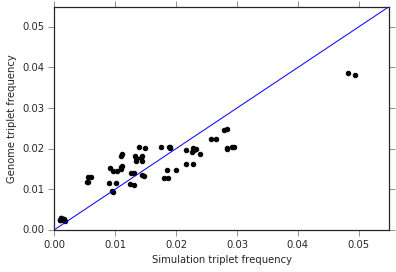

In [24]:
plt.scatter(triplet_counts_list,triplet_genome_counts_list, color = "black",  )
plt.plot([0,0.055], [0,0.055])
plt.xlabel("Simulation triplet frequency")
plt.ylabel("Genome triplet frequency")
sim_details = "100kBp_10xMuts_accurateIntoTrip"

plt.xlim((0,0.055))
plt.ylim((0,0.055))

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Data/Scatter_{t}_{l}Mbp_{p}propmuts_accurateINTO_genomeVsim.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

** adding the mutability coloration ** 

In [56]:
min_muts = min(muts)
integer_muts = [i/min_muts for i in muts]

In [55]:
min_muts

1.3198444035923253e-05

In [112]:
edge_colors = []
for mut in muts: 
    if mut <= 0.00020: 
        edge_colors.append("grey")
    elif mut <= 0.0003: 
        edge_colors.append("dimgrey")
    else: 
        edge_colors.append("black")
        

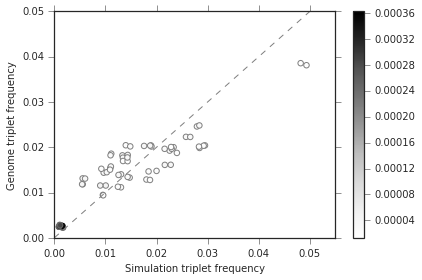

In [114]:
plt.scatter(triplet_counts_list,triplet_genome_counts_list, s = 30, color = muts, edgecolor = edge_colors, cmap = "Greys")
plt.plot([0,0.055], [0,0.055], color = "grey", linestyle='dashed')
plt.xlabel("Simulation triplet frequency")
plt.ylabel("Genome triplet frequency")
sim_details = "100kBp_10xMuts_accurateIntoTrip"

# plt.legend(loc = 4, handles=[patch1, patch2, patch3, patch4])
plt.colorbar()

plt.xlim((0,0.055))
plt.ylim((0,0.05))
# plt.xticks([0,0.01,0.02,0.03,0.04, 0.05])
# plt.yticks([0,0.01,0.02,0.03,0.04, 0.05])

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_accurateINTO_genomeVsim.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

In [ ]:
for key, value in 

# **appendix **

# ** PLOTTING TRIPLT FREQS ** 

In [5]:
triplet_counts = {}
muts = []
for triplet in triplets: 
    triplet_counts[triplet] = 0
    muts.append(model[triplet][0])

for i in tqdm(range(1, len(DNA)-2)):
    triplet = DNA[i-1:i+2]
    triplet_counts[triplet] += 1

triplet_counts_list = []
for triplet in triplets: 
    triplet_counts_list.append(triplet_counts[triplet])

100%|██████████| 99997/99997 [00:00<00:00, 1156198.15it/s]


In [11]:
plt.style.use("seaborn-darkgrid")

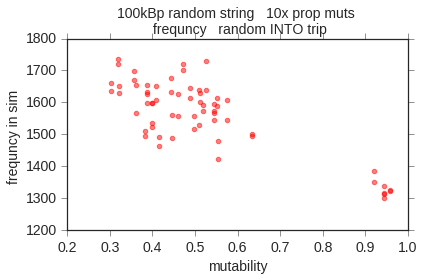

In [11]:
plt.scatter(muts,triplet_counts_list, color = "red", label = "freq in sim", alpha = 0.5)
plt.xlabel("mutability")
plt.ylabel("frequncy in sim ")
sim_details = "100kBp random string   10x prop muts \n frequncy   random INTO trip"
plt.title(sim_details)

plt.xlim((0.2,1))

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

# plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Data/Scatter_{t}_{l}Mbp_{p}propmuts_rnadomINTO.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

## ** plotting left / right ** 

In [6]:
triplet_chosen_left = []
triplet_chosen_centre = []
triplet_chosen_right = []
triplet_chosen_mean = []
triplet_into_left = []
triplet_into_centre = []
triplet_into_right = []
triplet_into_mean = []

muts = []
for triplet in triplets: 
    triplet_chosen_left.append(triplet_chosen_count_dict[triplet][0])
    triplet_chosen_centre.append(triplet_chosen_count_dict[triplet][1])
    triplet_chosen_right.append(triplet_chosen_count_dict[triplet][2])
    triplet_chosen_mean.append(np.mean(triplet_chosen_count_dict[triplet]))
    
    triplet_into_left.append(triplet_into_count_dict[triplet][0])
    triplet_into_centre.append(triplet_into_count_dict[triplet][1])
    triplet_into_right.append(triplet_into_count_dict[triplet][2])
    triplet_into_mean.append(np.mean(triplet_into_count_dict[triplet]))
    
    muts.append(model[triplet][0])

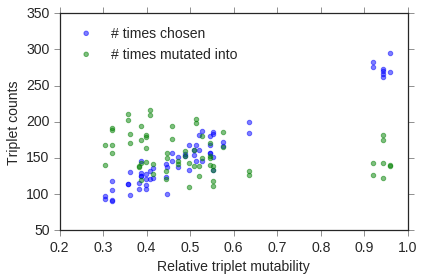

In [13]:
plt.style.use("seaborn-ticks")
plt.scatter(muts,triplet_chosen_centre, color = "blue", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_centre, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("Relative triplet mutability")
plt.ylabel("Triplet counts")
# sim_details = "1MB random string   0.05x prop muts \n new adj count: centre"
# plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

#font size 

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  

# plt.show()
timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
plt.tight_layout()
plt.savefig("Data/Scatter_{t}_{l}Mbp_{p}propmuts_accruateINTO_central.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

** understanding the sim: differences b/t muts ** 

## ** plotting left / right ** 

In [6]:
triplet_chosen_left = []
triplet_chosen_centre = []
triplet_chosen_right = []
triplet_chosen_mean = []
triplet_into_left = []
triplet_into_centre = []
triplet_into_right = []
triplet_into_mean = []

muts = []
for triplet in triplets: 
    triplet_chosen_left.append(triplet_chosen_count_dict[triplet][0])
    triplet_chosen_centre.append(triplet_chosen_count_dict[triplet][1])
    triplet_chosen_right.append(triplet_chosen_count_dict[triplet][2])
    triplet_chosen_mean.append(np.mean(triplet_chosen_count_dict[triplet]))
    
    triplet_into_left.append(triplet_into_count_dict[triplet][0])
    triplet_into_centre.append(triplet_into_count_dict[triplet][1])
    triplet_into_right.append(triplet_into_count_dict[triplet][2])
    triplet_into_mean.append(np.mean(triplet_into_count_dict[triplet]))
    
    muts.append(model[triplet][0])

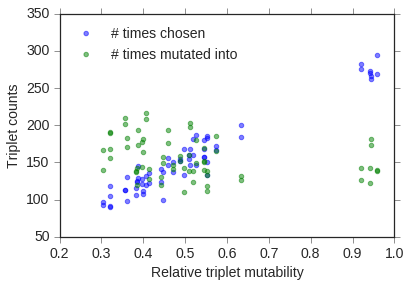

In [9]:
plt.style.use("seaborn-ticks")
plt.scatter(muts,triplet_chosen_centre, color = "blue", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_centre, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("Relative triplet mutability")
plt.ylabel("Triplet counts")
# sim_details = "1MB random string   0.05x prop muts \n new adj count: centre"
# plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

#font size 

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Data/Scatter_{t}_{p}propmuts.png".format(p = prop_muts, t = timestamp))

In [8]:
len(triplet_into_right,)

64

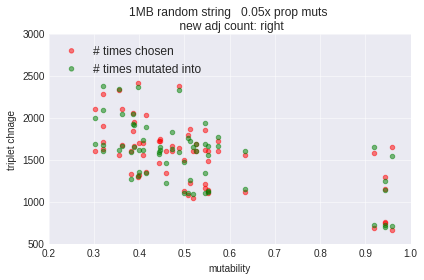

In [9]:
plt.scatter(muts,triplet_chosen_right, color = "red", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_right, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("mutability")
plt.ylabel("triplet chnage")
sim_details = "1MB random string   0.05x prop muts \n new adj count: right"
plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

# plt.show()
timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
plt.tight_layout()
plt.savefig("Data/Scatter_{t}_{p}propmuts.png".format(p = prop_muts, t = timestamp))

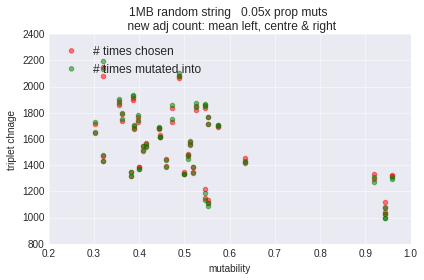

In [10]:
plt.scatter(muts,triplet_chosen_mean, color = "red", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_mean, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("mutability")
plt.ylabel("triplet chnage")
sim_details = "1MB random string   0.05x prop muts \n new adj count: mean left, centre & right"
plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

# plt.show()
timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
plt.tight_layout()
plt.savefig("Data/Scatter_{t}_{p}propmuts.png".format(p = prop_muts, t = timestamp))

 # ** TRIPLET COUNT CHNAGE PLOT ** 

In [12]:
trip_count_dict_init_final = {}

for triplet in triplets: 
    trip_count_dict_init_final[triplet] = [0,0]
    
for index in tqdm(range(1,len(DNA_initial)-1)): 
    triplet = DNA_initial[index-1:index+2]
    trip_count_dict_init_final[triplet][0] += 1
    
    triplet = DNA[index-1:index+2]
    trip_count_dict_init_final[triplet][1] += 1

triplet_change = []
for triplet in triplets: 
    triplet_change.append(trip_count_dict_init_final[triplet][1]- trip_count_dict_init_final[triplet][0])
    
    

100%|██████████| 9998/9998 [00:00<00:00, 686159.72it/s]


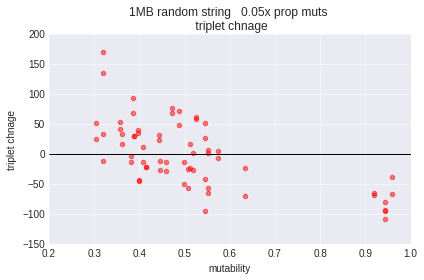

In [13]:
plt.scatter(muts,triplet_change, color = "red", label = "# times chosen", alpha = 0.5)
plt.xlabel("mutability")
plt.ylabel("triplet chnage")
sim_details = "1MB random string   0.05x prop muts \n triplet chnage"
plt.title(sim_details)

plt.hlines(0, xmin = 0.2, xmax = 1)
plt.xlim((0.2,1))

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

# plt.show()
timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
plt.tight_layout()
plt.savefig("Data/Scatter_{t}_{p}propmuts.png".format(p = prop_muts, t = timestamp))

In [95]:
mut_indices.sort()
mut_chosen_differences = []
for index,value in enumerate(mut_indices): 
    if index != 0: 
        mut_chosen_differences.append( value - mut_indices[index-1])
    

In [24]:
2+2

4

(array([  3.28190000e+04,   1.12410000e+04,   3.93600000e+03,
          1.30200000e+03,   4.68000000e+02,   1.35000000e+02,
          6.50000000e+01,   2.00000000e+01,   9.00000000e+00,
          4.00000000e+00]),
 array([   0. ,   21.4,   42.8,   64.2,   85.6,  107. ,  128.4,  149.8,
         171.2,  192.6,  214. ]),
 <a list of 10 Patch objects>)

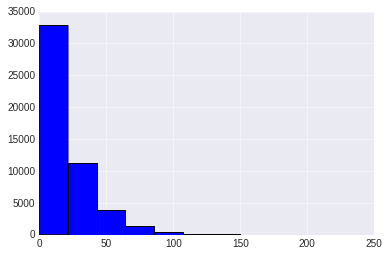

In [109]:
plt.hist(mut_chosen_differences)

In [49]:
for gen in tqdm(range(int(len(DNA)/10))): 
    base_index = base_to_mutate(DNA, current_weights, indices, mut_indices)
    #     print(mut_indices)
    #     print(base_index)
    indices = indices[0:base_index -2]+indices[base_index+3:]
    current_weights = current_weights[0:base_index -2]+current_weights[base_index+3:]
    mut_indices.append(base_index)


100%|██████████| 3/3 [00:00<00:00, 3345.63it/s]


In [51]:
mut_indices

[9, 3, 15]

In [50]:
indices


[1, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [127]:

for i in tqdm(range(int(len(DNA)/10))):
    base_index = base_to_mutate(DNA, current_weights, indices, mut_indices)
    
    curr_index = indices.index(base_index)
    indices = indices[0:curr_index -3]+indices[curr_index+4:]
    current_weights = current_weights[0:curr_index -3]+current_weights[curr_index+4:]

    c_triplet = DNA[base_index-1: base_index+2]

    curr_into_bases = ["A", "T", "C", "G"]
    curr_into_bases.remove(c_triplet[1])
    mb =  choice(curr_into_bases)

    DNA = DNA[:base_index]+mb+DNA[base_index+1:]
    #print(base_index, indices, mb, sep = "\t")

100%|██████████| 1100/1100 [00:04<00:00, 225.03it/s]


In [146]:
len(mut_indices)

1100

In [130]:
len(set(mut_indices))

1100

In [134]:
mut_indices.sort()

In [140]:
fuckups = []
for index, value in enumerate(mut_indices): 
    if index != 0: 
        diff = value - mut_indices[index-1]
        if diff <= 3: 
            fuckups.append([value, mut_indices[index-1]])


In [149]:
fuckups[0:10]

[[463, 461],
 [945, 942],
 [968, 965],
 [1491, 1489],
 [1755, 1754],
 [2113, 2111],
 [2142, 2139],
 [2255, 2253],
 [2652, 2649],
 [2729, 2726]]

In [161]:
DNA = "ATGTGTAGTCT"*1000
current_weights = [choice([0.35, 0.1, 0.5, 0.21]) for x in range(1,len(DNA)-1)]
indices = [i for i in range(1, len(DNA)-1)]
mut_indices = []


In [49]:
into_triplets = []
into_weights = []
for into_triplet, into_weight in model[triplet][1].items(): 
    into_triplets.append(into_triplet)
    into_weights.append(into_weight)

into_weight_sum = sum(into_weights) 
for index, value in enumerate(into_weights): 
    into_weights[index] = value/into_weight_sum

mTriplet = choice(into_triplets, p = into_weights)
    
print(into_triplets, into_weights)

CTC
['CGC', 'CAC', 'CTC'] [0.2352525609325327, 0.11974567290709998, 0.6450017661603674]


In [66]:

    #print(base_index, indices,  sep = "\t")

100%|██████████| 10000/10000 [03:35<00:00, 46.49it/s]


10000

10000

In [145]:
461 in mut_indices

True

In [133]:
len(set(("hello", "goodbye", "hello")))

2

In [101]:
print(DNA, base_index, mb, sep = "\t")

ATGTGTAGTAT	9	A


In [103]:
print(DNA, base_index, mb, sep = "\t")

ATGTGTAGCAT	8	C


** old base to mutate before tried to do the optimization ** 

In [2]:
def base_to_mutate(DNA, current_weights, indices): 
    """
    (DNA: str, weights: Dict) -> int
    
    Will return the index of a random choice of a base that will be mutated based on probabilities given by the
    weights dictionary (i.e. the model)
    ex. "ATCGTA" --> index 3 ("G") will mutate
    """

    # NORMALIZE THE POPULATION OF WEIGHTS    
    total_freq = sum(current_weights) 
    normalized_weights = copy.copy(current_weights)
    for index, value in enumerate(current_weights):
        normalized_weights[index] = value/total_freq 

    # DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
    base_index = choice(indices, p=normalized_weights) 
        
    
    # RETURN THE INDEX
    return base_index



In [79]:
# NORMALIZE THE POPULATION OF WEIGHTS    
s0 = time.time ()
total_freq = sum(current_weights) 
s1 = time.time()
t1 = time.time() - s0

normalized_weights = ["error"]*len(current_weights)
s2 = time.time()
t2 = time.time() - s1

for index, value in enumerate(current_weights):
    normalized_weights[index] = value/total_freq 
s3 = time.time()
t3 = time.time() - s2

# DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
base_index = choice(indices, p=normalized_weights) 
s4 = time.time()
t4 = time.time() - s3


In [80]:
print(t1,t2,t3,t4)

0.005890607833862305 0.012868881225585938 0.1864941120147705 0.11419153213500977


In [78]:
cpg_trips = []
for trip, mut in zip(triplets, muts): 
    if mut >= 0.79: 
        cpg_trips.append(trip)

** why do the CpGs differ? checkingt he # in the mutation dataset ** 

In [75]:
mutations = {'AAT': [2304, {'ATT': 261, 'AGT': 1782, 'ACT': 261}], 'CTT': [1070, {'CAT': 148, 'CCT': 661, 'CGT': 261}], 'GAG': [759, {'GCG': 162, 'GTG': 186, 'GGG': 411}], 'TAC': [797, {'TGC': 571, 'TTC': 118, 'TCC': 108}], 'GCT': [1356, {'GGT': 256, 'GAT': 235, 'GTT': 865}], 'TCA': [1500, {'TGA': 363, 'TTA': 943, 'TAA': 194}], 'GGC': [1403, {'GTC': 333, 'GCC': 247, 'GAC': 823}], 'CTG': [1344, {'CGG': 277, 'CAG': 208, 'CCG': 859}], 'CAA': [1023, {'CGA': 602, 'CTA': 120, 'CCA': 301}], 'GTC': [584, {'GCC': 342, 'GAC': 137, 'GGC': 105}], 'TGC': [1314, {'TAC': 812, 'TTC': 321, 'TCC': 181}], 'TAA': [1240, {'TGA': 703, 'TTA': 270, 'TCA': 267}], 'TAG': [716, {'TTG': 102, 'TCG': 114, 'TGG': 500}], 'ACG': [2881, {'AAG': 131, 'AGG': 89, 'ATG': 2661}], 'GAA': [807, {'GTA': 160, 'GCA': 198, 'GGA': 449}], 'AAG': [1027, {'ACG': 230, 'AGG': 625, 'ATG': 172}], 'CAT': [2373, {'CCT': 329, 'CTT': 352, 'CGT': 1692}], 'CAC': [928, {'CCC': 194, 'CGC': 558, 'CTC': 176}], 'GAC': [505, {'GTC': 129, 'GCC': 85, 'GGC': 291}], 'TCC': [1543, {'TAC': 236, 'TTC': 939, 'TGC': 368}], 'TTG': [981, {'TCG': 554, 'TGG': 270, 'TAG': 157}], 'GGT': [1738, {'GCT': 261, 'GAT': 936, 'GTT': 541}], 'AGC': [1405, {'AAC': 890, 'ACC': 299, 'ATC': 216}], 'TGA': [1527, {'TTA': 190, 'TCA': 389, 'TAA': 948}], 'ACA': [2467, {'AAA': 417, 'ATA': 1618, 'AGA': 432}], 'AAC': [887, {'ACC': 159, 'ATC': 134, 'AGC': 594}], 'AGT': [1795, {'AAT': 1061, 'ATT': 277, 'ACT': 457}], 'ACT': [1751, {'AAT': 273, 'ATT': 1054, 'AGT': 424}], 'CCC': [1486, {'CGC': 351, 'CAC': 178, 'CTC': 957}], 'GGA': [1560, {'GTA': 292, 'GCA': 336, 'GAA': 932}], 'TCG': [1735, {'TTG': 1593, 'TGG': 87, 'TAG': 55}], 'TGT': [2521, {'TTT': 413, 'TCT': 456, 'TAT': 1652}], 'GTG': [963, {'GCG': 603, 'GAG': 169, 'GGG': 191}], 'GTT': [930, {'GCT': 622, 'GAT': 144, 'GGT': 164}], 'TTA': [1273, {'TGA': 249, 'TCA': 724, 'TAA': 300}], 'AGG': [1697, {'AAG': 1145, 'ACG': 370, 'ATG': 182}], 'CGA': [1797, {'CCA': 97, 'CTA': 40, 'CAA': 1660}], 'ATC': [1026, {'AAC': 319, 'AGC': 115, 'ACC': 592}], 'GGG': [1345, {'GCG': 315, 'GTG': 161, 'GAG': 869}], 'CTA': [815, {'CCA': 566, 'CGA': 139, 'CAA': 110}], 'CGT': [2877, {'CAT': 2651, 'CCT': 107, 'CTT': 119}], 'GAT': [985, {'GCT': 119, 'GGT': 587, 'GTT': 279}], 'GTA': [811, {'GCA': 599, 'GAA': 116, 'GGA': 96}], 'TTC': [845, {'TAC': 169, 'TCC': 479, 'TGC': 197}], 'CTC': [769, {'CCC': 434, 'CGC': 169, 'CAC': 166}], 'GCC': [1419, {'GTC': 866, 'GAC': 340, 'GGC': 213}], 'CCA': [1450, {'CGA': 296, 'CTA': 1016, 'CAA': 138}], 'TCT': [1968, {'TTT': 939, 'TGT': 681, 'TAT': 348}], 'AAA': [1688, {'ACA': 510, 'AGA': 885, 'ATA': 293}], 'CGG': [2476, {'CTG': 21, 'CAG': 2348, 'CCG': 107}], 'CAG': [1330, {'CGG': 860, 'CTG': 188, 'CCG': 282}], 'ATA': [2382, {'ACA': 1913, 'AAA': 294, 'AGA': 175}], 'TTT': [1753, {'TCT': 918, 'TGT': 509, 'TAT': 326}], 'TGG': [1466, {'TTG': 159, 'TCG': 310, 'TAG': 997}], 'TAT': [2465, {'TTT': 294, 'TGT': 1975, 'TCT': 196}], 'CGC': [2164, {'CCC': 66, 'CAC': 1966, 'CTC': 132}], 'GCG': [2192, {'GGG': 54, 'GTG': 1978, 'GAG': 160}], 'ATT': [2231, {'AAT': 317, 'AGT': 253, 'ACT': 1661}], 'ACC': [1728, {'AAC': 550, 'AGC': 268, 'ATC': 910}], 'CCG': [2424, {'CGG': 122, 'CTG': 2274, 'CAG': 28}], 'GCA': [1440, {'GTA': 845, 'GAA': 353, 'GGA': 242}], 'CCT': [1788, {'CAT': 181, 'CTT': 1177, 'CGT': 430}], 'AGA': [2010, {'ACA': 704, 'AAA': 955, 'ATA': 351}], 'ATG': [2255, {'AAG': 341, 'ACG': 1625, 'AGG': 289}]}

In [80]:
tmp_sum = 0
tmp_sum_cpg = 0
for key, value in mutations.items(): 
    tmp_sum += value[0]
    if key in cpg_trips: 
        tmp_sum_cpg += value[0]

In [83]:
print("total muts = ", tmp_sum, "total_cpgs = ", tmp_sum_cpg)

total muts =  98089 total_cpgs =  18546


# ** bvinning into colors ** 

In [25]:
mut_rangeSize = max(muts) - min(muts)
mut_nbin = 4
mut_windowSize = mut_rangeSize/mut_nbin
mut_rangeValues = [min(muts)+i*mut_windowSize for i in range(0,mut_nbin+1)]
print(mut_rangeValues)

[1.3198444035923253e-05, 0.00010044172961771483, 0.0001876850151995064, 0.00027492830078129795, 0.00036217158636308954]


In [45]:
colour_list_muts = []
for value in muts: 
    if value <= mut_rangeValues[1]: 
        colour_list_muts.append("grey")
    elif value <= mut_rangeValues[2]: 
        colour_list_muts.append("lightgrey")
    elif value <= mut_rangeValues[3]: 
        colour_list_muts.append("blue")
    elif value >= mut_rangeValues[3]: 
        colour_list_muts.append("crimson")
    

In [46]:
legendplot = [ "{:.0e}".format(i) for i in mut_rangeValues]

patch1 = mpatches.Patch(color='grey', label=legendplot[0]+" : "+legendplot[1])
patch2 = mpatches.Patch(color='lightgrey', label=legendplot[1]+" : "+legendplot[2])
patch3 = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
patch4 = mpatches.Patch(color='crimson', label=legendplot[3]+" : "+legendplot[4])

In [42]:
legendplot

['1e-05', '1e-04', '2e-04', '3e-04', '4e-04']

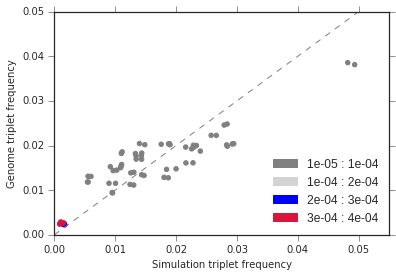

In [92]:
plt.scatter(triplet_counts_list,triplet_genome_counts_list, color = colour_list_muts, edgecolors = colour_list_muts)
plt.plot([0,0.055], [0,0.055], color = "grey", linestyle='dashed')
plt.xlabel("Simulation triplet frequency")
plt.ylabel("Genome triplet frequency")
sim_details = "100kBp_10xMuts_accurateIntoTrip"

plt.legend(loc = 4, handles=[patch1, patch2, patch3, patch4])

plt.xlim((0,0.055))
plt.ylim((0,0.05))
# plt.xticks([0,0.01,0.02,0.03,0.04, 0.05])
# plt.yticks([0,0.01,0.02,0.03,0.04, 0.05])

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Data/Scatter_{t}_{l}Mbp_{p}propmuts_accurateINTO_genomeVsim.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))